<a href="https://colab.research.google.com/github/minicks/Deeplearning/blob/main/2.FNN/AI%EB%8A%94_%EC%B2%B4%EA%B2%A9%EB%A7%8C_%EB%B3%B4%EA%B3%A0_%EC%B2%B4%EC%A4%91%EC%9D%84_%EC%B6%94%EB%A1%A0%ED%95%A0_%EC%88%98_%EC%9E%88%EC%9D%84%EA%B9%8C%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd /content/drive/MyDrive/수학·통계를 몰라도 이해할 수 있는 쉬운 딥러닝 코드 소스/[2편] 인간의 뇌세포를 흉내 낸 인공지능 - FNN/[6장] 회귀(Regression) 기법 활용하기/2_6_2_AI는 체격만 보고 체중을 추론할 수 있을까

/content/drive/MyDrive/수학·통계를 몰라도 이해할 수 있는 쉬운 딥러닝 코드 소스/[2편] 인간의 뇌세포를 흉내 낸 인공지능 - FNN/[6장] 회귀(Regression) 기법 활용하기/2_6_2_AI는 체격만 보고 체중을 추론할 수 있을까


In [ ]:
from tensorflow import keras
import data_reader

In [ ]:
# 몇 에포크 만큼 학습을 시킬 것인지 결정합니다.
EPOCHS = 50  # 예제 기본값은 50입니다.

In [ ]:
# 데이터를 읽어옵니다.
dr = data_reader.DataReader()



Data Read Done!
Training X Size : (134384, 7)
Training Y Size : (134384,)
Test X Size : (33596, 7)
Test Y Size : (33596,)




In [ ]:
# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Dense(7),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# 인공신경망을 컴파일합니다.
model.compile(optimizer="adam", loss="mse", metrics=['mae'])

In [ ]:
# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])



************ TRAINING START ************ 
Epoch 1/50
4200/4200 [==============================] - 19s 4ms/step - loss: 0.0018 - mae: 0.0316 - val_loss: 0.0012 - val_mae: 0.0261
Epoch 2/50
4200/4200 [==============================] - 18s 4ms/step - loss: 0.0013 - mae: 0.0274 - val_loss: 0.0013 - val_mae: 0.0270
Epoch 3/50
4200/4200 [==============================] - 18s 4ms/step - loss: 0.0013 - mae: 0.0269 - val_loss: 0.0013 - val_mae: 0.0270
Epoch 4/50
4200/4200 [==============================] - 18s 4ms/step - loss: 0.0013 - mae: 0.0268 - val_loss: 0.0012 - val_mae: 0.0254
Epoch 5/50
4200/4200 [==============================] - 18s 4ms/step - loss: 0.0013 - mae: 0.0266 - val_loss: 0.0012 - val_mae: 0.0253
Epoch 6/50
4200/4200 [==============================] - 18s 4ms/step - loss: 0.0013 - mae: 0.0265 - val_loss: 0.0013 - val_mae: 0.0270
Epoch 7/50
4200/4200 [==============================] - 18s 4ms/step - loss: 0.0013 - mae: 0.0264 - val_loss: 0.0012 - val_mae: 0.0258
Epoch 8/50


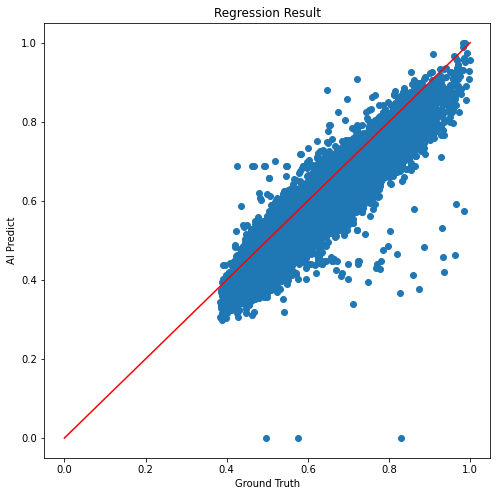

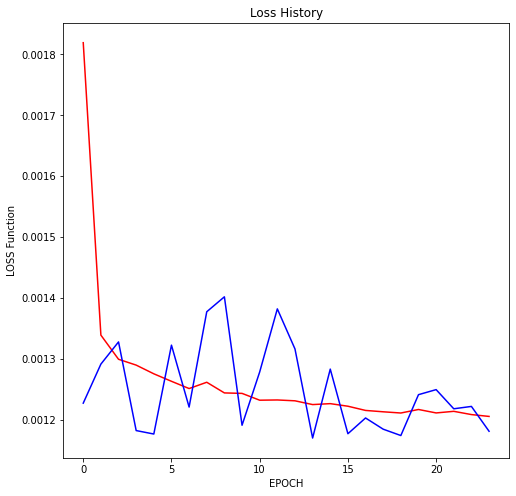

In [ ]:
# 학습 결과를 그래프로 출력합니다.
data_reader.draw_graph(model(dr.test_X), dr.test_Y, history)